![](https://i.imgur.com/0AUxkXt.png)

# SF Salaries Exercise 

Explore San Francisco city employee salary data.

## Overview

One way to understand how a city government works is by looking at who it employs and how its employees are compensated. This data contains the names, job title, and compensation for San Francisco city employees on an annual basis from 2011 to 2014.



Just follow along and complete the tasks outlined in bold below. The tasks will get harder and harder as you go along.

## Resourses

[Pandas API Reference](https://pandas.pydata.org/pandas-docs/stable/api.html)

[NumPy Reference](https://docs.scipy.org/doc/numpy/reference/)

[Visualization with Seaborn](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html)


**Import libraries**

In [0]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns

**Read `Salaries.csv` as a dataframe called `sal`.**

In [0]:
# get file csv and read file by pandas
link = "https://s3-ap-southeast-1.amazonaws.com/intro-to-ml-minhdh/Salaries.csv"
sal = pd.read_csv(link)

**Check the head of the DataFrame.**

In [0]:
# Get the first 5 rows
sal.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


**Use the .info() method to find out how many entries there are.**

In [0]:
# use info() to get info of dataFrame
sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
Id                  148654 non-null int64
EmployeeName        148654 non-null object
JobTitle            148654 non-null object
BasePay             148045 non-null float64
OvertimePay         148650 non-null float64
OtherPay            148650 non-null float64
Benefits            112491 non-null float64
TotalPay            148654 non-null float64
TotalPayBenefits    148654 non-null float64
Year                148654 non-null int64
Notes               0 non-null float64
Agency              148654 non-null object
Status              0 non-null float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


**What is the average BasePay ?**

Keyword: [mean](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mean.html)

In [27]:
# average of column is mean()
averageBasePay = sal.loc[:,"BasePay"].mean()
print("Average BasePay is %.2f" % (averageBasePay))

Average BasePay is 66325.45


**What is the lowest and highest amount of BasePay?**

Keyword: 
[min](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.min.html) , 
[max](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.max.html)

In [28]:
# lowest of column is min()
minBasePay = sal.loc[:,"BasePay"].min()
print("Min BasePay is %.2f" % (minBasePay))

Min BasePay is -166.01


In [29]:
# highest of column is max()
maxBasePay = sal.loc[:,"BasePay"].max()
print("Max BasePay is %.2f" % (maxBasePay))

Max BasePay is 319275.01


**How about OvertimePay in the dataset? What is the average, lowest, highest amount?**

In [26]:
overTimePay = sal.loc[:,"OvertimePay"];

# Use mean(), min(), max() to get average, lowest, highest
averageOvertimePay = overTimePay.mean()
minOvertimePay = overTimePay.min()
maxOvertimePay = overTimePay.max()


print("Average OvertimePay is %.2f" % (averageOvertimePay))
print("Min OvertimePay is %.2f" % (minOvertimePay))
print("Max OvertimePay is %.2f" % (maxOvertimePay))


Average OvertimePay is 5066.06
Min OvertimePay is -0.01
Max OvertimePay is 245131.88


**What is the job title of  JOSEPH DRISCOLL ? Note: Use all caps, otherwise you may get an answer that doesn't match up (there is also a lowercase Joseph Driscoll).**

In [30]:
# filter with EmployeeName
nameFind1 = sal[sal['EmployeeName'] == 'JOSEPH DRISCOLL']

# convert to array
jobTitle = nameFind1['JobTitle'].values

# get first value of array
print('Job title of JOSEPH DRISCOLL is: ' + jobTitle[0])

Job title of JOSEPH DRISCOLL is: CAPTAIN, FIRE SUPPRESSION


In [31]:
# Now try to select Employees who have name "GARY JIMENEZ"
# Your code here

# filter with EmployeeName
nameFind2 = sal[sal['EmployeeName'] == 'GARY JIMENEZ']

# convert to array
jobTitle = nameFind1['JobTitle'].values

# get first value of array
print('Job title of GARY JIMENEZ is: ' + jobTitle[0])

Job title of GARY JIMENEZ is: CAPTAIN, FIRE SUPPRESSION


**How much does JOSEPH DRISCOLL make (including benefits)?**

In [33]:
# get column TotalPayBenefits of JOSEPH DRISCOLL and convert to array
TotalPayBenefitsOfJoseph = nameFind1['TotalPayBenefits'].values

# get first value of array
print('JOSEPH DRISCOLL make: %.2f' % (TotalPayBenefitsOfJoseph[0]))

JOSEPH DRISCOLL make: 270324.91


**What is the name of highest paid person (including benefits)?**

In [36]:
# get salary max by max() and filter dataframe with value of max
highestPaidPerson = sal[sal['TotalPayBenefits'] == sal['TotalPayBenefits'].max()]

# get the first row info
print('Highest paid person is: ' + highestPaidPerson['EmployeeName'].values[0])

Highest paid person is: NATHANIEL FORD


**What is the name of lowest paid person (including benefits)? Do you notice something strange about how much he or she is paid?**

In [43]:
# get salary min by min() and filter dataframe with value of min
lowestPaidPerson = sal[sal['TotalPayBenefits'] == sal['TotalPayBenefits'].min()]

# get the first row info
print('Lowest paid person is: ' + lowestPaidPerson['EmployeeName'].values[0])

print('He is paid: %.2f' % (lowestPaidPerson['TotalPayBenefits'].values[0]))

print('The strange is: The amount paid is a negative number.')

Lowest paid person is: Joe Lopez
He is paid: -618.13
The strange is: The amount paid is a negative number.


**What was the average (mean) BasePay of all employees per year? (2011-2014) ?**
Keyword: _groupby_

In [44]:
# groupby to get value by column 
salYear = sal.groupby('Year').mean()
salYear['BasePay']

Year
2011    63595.956517
2012    65436.406857
2013    69630.030216
2014    66564.421924
Name: BasePay, dtype: float64

**How many unique job titles are there?**

Keyword: _unique, nunique_

In [46]:
# unnique() get number of unique
numberUniqueJobTitle = sal['JobTitle'].nunique()
print('There are %.d unique job title' % (numberUniqueJobTitle))

There are 2159 unique job title


**What are the top 5 most common jobs?**

Keyword: *value_counts*

In [0]:
# funtion value_counts() count the same value
sal['JobTitle'].value_counts().head(5)

Transit Operator                7036
Special Nurse                   4389
Registered Nurse                3736
Public Svc Aide-Public Works    2518
Police Officer 3                2421
Name: JobTitle, dtype: int64

**How many Job Titles were represented by only one person in 2013? (e.g. Job Titles with only one occurence in 2013?)**

In [49]:
sal2013 = sal[sal['Year'] == 2013]
array2013 = sal2013['JobTitle'].value_counts()

# funtion .loc return new array True or False with condition inside
# sum is count value True in array

jobTitleOnlyOne = sum(array2013.loc[array2013 == 1])

print('Number of Job title represented by only one person in 2013: %.d' % (jobTitleOnlyOne))

Number of Job title represented by only one person in 2013: 202


**How many people have the word Chief in their job title?**

In [50]:
# use contanins to filter substring in a string
salChief = sal['JobTitle'].str.contains('Chief')

# use sum() to count value True in a array True/False
jobTitleChief = salChief.sum()

print('Number of Job Title have the word Chief: %.d' % (jobTitleChief))

Number of Job Title have the word Chief: 423


## Data Visualization

**Implement seaborn's countplot with x='Year'**

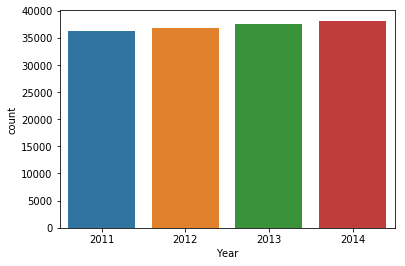

In [51]:
# use countplot to count value in dataframe
sns.countplot(x="Year", data=sal)

**Implement seaborn's distplot for BasePay of Year 2011**

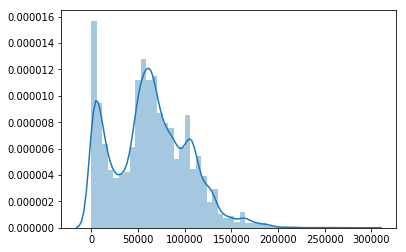

In [56]:
# filter year = 2011 and convert to array
basePay2011 = sal[sal['Year'] == 2011]['BasePay'].values

# remove value Not A Number
basePay2011 = basePay2011[~np.isnan(basePay2011)]
sns.distplot(basePay2011)

**How about other Year**

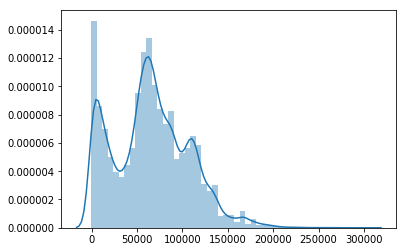

In [55]:
# filter year = 2012 and convert to array
basePay2012 = sal[sal['Year'] == 2012]['BasePay'].values

# remove value Not A Number
basePay2012 = basePay2012[~np.isnan(basePay2012)]
sns.distplot(basePay2012)

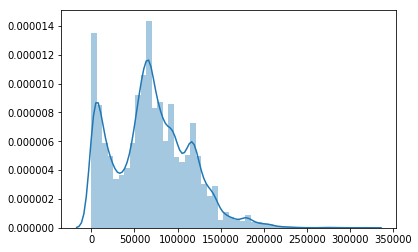

In [57]:
# filter year = 2013 and convert to array
basePay2013 = sal[sal['Year'] == 2013]['BasePay'].values

# remove value Not A Number
basePay2013 = basePay2013[~np.isnan(basePay2013)]
sns.distplot(basePay2013)

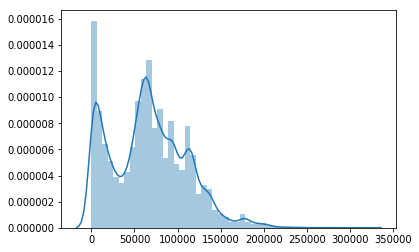

In [58]:
# filter year = 2014 and convert to array
basePay2014 = sal[sal['Year'] == 2014]['BasePay'].values

# remove value Not A Number
basePay2014 = basePay2014[~np.isnan(basePay2014)]
sns.distplot(basePay2014)

## Bonus

**Visualize top 5 Jobs with BasePay, Benefits and OvertimePay**

Keyword: *index, isin, groupby, mean, plot*

In [0]:
# Group by jobtitle
groupJob = sal.groupby('JobTitle').mean()

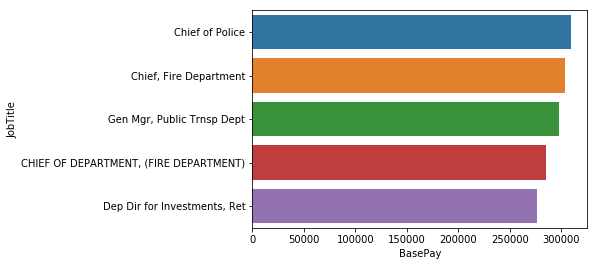

In [60]:
# Sort with BasePay and get top 5
groupJobTopBasePay5 = groupJob.sort_values(by=['BasePay'], ascending=False).head(5)

# After groupby, reset index
groupJobTopBasePay5.reset_index(inplace=True)

# Visualize BasePay with barplot
sns.barplot(x='BasePay', y='JobTitle', data=groupJobTopBasePay5);

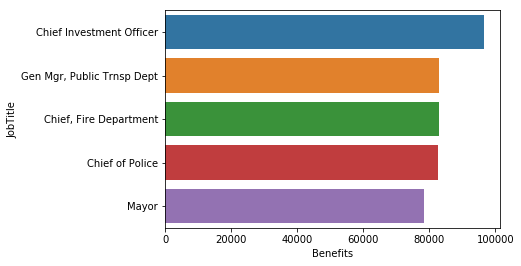

In [63]:
# Sort with Benefits and get top 5
groupJobTopBenefits5 = groupJob.sort_values(by=['Benefits'], ascending=False).head(5)

# After groupby, reset index
groupJobTopBenefits5.reset_index(inplace=True)

# Visualize Benefits with barplot
sns.barplot(x='Benefits', y='JobTitle', data=groupJobTopBenefits5);

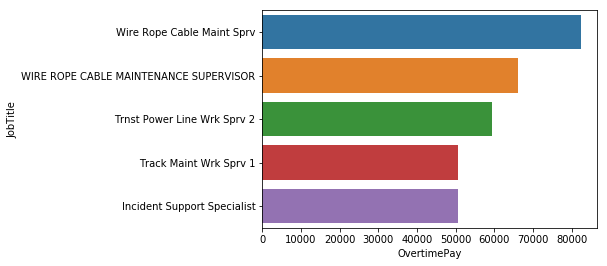

In [62]:
# Sort with OvertimePay and get top 5
groupJobTopOvertimePay5 = groupJob.sort_values(by=['OvertimePay'], ascending=False).head(5)

# After groupby, reset index
groupJobTopOvertimePay5.reset_index(inplace=True)

# Visualize OvertimePay with barplot
sns.barplot(x='OvertimePay', y='JobTitle', data=groupJobTopOvertimePay5);

**Fun Fact: Is there a correlation between length of the Job Title string and Salary?**

*Hint: corr()*

In [65]:
# use corr to get correlation between two columns
corrJobTitleAndSalary = sal['JobTitle'].str.len().corr(sal['TotalPayBenefits'])

print('Correlation between length of the Job Title string and Salary is: %.2f' % (abs(corrJobTitleAndSalary)))

Correlation between length of the Job Title string and Salary is: 0.04


# Great Job!